# CMSE 802 Pre-class assignment: Pandas
## Date: 11/16/2018
## Due: 11/19/2018; 10:30 PM

### The goal of this assignment is to familiarize ourselves with the python library Pandas.

---
### Your name: Boyao Zhu


Pandas can be used for data preprocessing, exploration, analysis and visualization. A useful way of thinking about it is as a combination of Numpy arrays and Dictionaries (where keys replace indices). More information can be found here: http://pandas.pydata.org/

The following tutorial is adapted from: http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
and
http://pandas.pydata.org/pandas-docs/stable/10min.html

---

Let us begin with importing the necessary libraries:

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

---
The main data structures in Pandas are: **Series** and **DataFrames**.


### Activity 1:

A **Series** is a 1-dimensional object similar to a numpy array or a list, but visualized as a table with one column:

In [2]:
# create a Series with an arbitrary list
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

Alternatively, you can specify an index to use when creating the Series.

** Do this: ** Create a list "indices" with five elements:

In [4]:
indices = [1,2,3,4,5] 

In [5]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],  indices)
s

1                7
2       Heisenberg
3             3.14
4      -1789710578
5    Happy Eating!
dtype: object

The Series constructor can convert a dictonary as well, using the keys of the dictionary as its index.

**Do this:** Create a dictionary "d" with the names of 5 cities as keys; include the population for 3 of them and the value "None" for the other two. You can search the populations of your chosen cities on wikipedia.

In [19]:
d = {"city1":100, "city2":102, "city3":87, "city4":None, "city5":None}

In [20]:
cities = pd.Series(d)
cities

city1    100.0
city2    102.0
city3     87.0
city4      NaN
city5      NaN
dtype: float64

You can use the index to select specific items from the Series ...

**Do this:** Complete the code below:

In [22]:
cities[["city1","city4"]]

city1    100.0
city4      NaN
dtype: float64

Or you can use boolean indexing for selection. For instance, let's see which cities have population less than 1'000,000

In [23]:
cities[ cities < 1e6 ]

city1    100.0
city2    102.0
city3     87.0
dtype: float64

Here the command "cities < 1e6" returns a Series of True/False values, which we then pass to our Series cities, returning the corresponding True items.

In [24]:
less_than_1e6 = cities < 1e6
print(less_than_1e6)
print('\n')
print(cities[less_than_1e6])

city1     True
city2     True
city3     True
city4    False
city5    False
dtype: bool


city1    100.0
city2    102.0
city3     87.0
dtype: float64


Mathematical operations can be done using scalars and numpy functions.

In [25]:
# divide city values by 3
cities / 3

city1    33.333333
city2    34.000000
city3    29.000000
city4          NaN
city5          NaN
dtype: float64

In [26]:
# square city values
np.square(cities)

city1    10000.0
city2    10404.0
city3     7569.0
city4        NaN
city5        NaN
dtype: float64

You can add two Series together, which returns a union of the two Series with the addition occurring on the shared index values. Values on either Series that did not have a shared index will produce a NULL/NaN (not a number).

** Do this: ** Complete the code below

In [28]:
cities[["city1","city3","city4"]] + cities[["city3","city5"]]

city1      NaN
city3    174.0
city4      NaN
city5      NaN
dtype: float64

NULL checking can be performed with "isnull" and "notnnull"

In [29]:
# returns a boolean series indicating which values aren't NULL
cities.notnull()

city1     True
city2     True
city3     True
city4    False
city5    False
dtype: bool

In [30]:
# use boolean logic to grab the NULL cities
print(cities.isnull())
print('\n')
print(cities[cities.isnull()])

city1    False
city2    False
city3    False
city4     True
city5     True
dtype: bool


city4   NaN
city5   NaN
dtype: float64


---
### Activity 2


A **DataFrame** is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

To create a DataFrame out of common Python data structures, we can pass a dictionary of lists to the DataFrame constructor.

Using the columns parameter allows us to tell the constructor how we'd like the columns ordered. By default, the DataFrame constructor will order the columns alphabetically.

In [34]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
#print (data)
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])

football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


You can convert DataFrame to array.

In [32]:
football.values

array([[2010, 'Bears', 11, 5],
       [2011, 'Bears', 8, 8],
       [2012, 'Bears', 10, 6],
       [2011, 'Packers', 15, 1],
       [2012, 'Packers', 11, 5],
       [2010, 'Lions', 6, 10],
       [2011, 'Lions', 10, 6],
       [2012, 'Lions', 4, 12]], dtype=object)

Describe shows a quick statistic summary of the numerical entries in your data

In [35]:
football.describe()

,year,wins,losses
count,8.000000,8.000000,8.000000
mean,2011.125000,9.375000,6.625000
std,0.834523,3.377975,3.377975
min,2010.000000,4.000000,1.000000
25%,2010.750000,7.500000,5.000000
50%,2011.000000,10.000000,6.000000
75%,2012.000000,11.000000,8.500000
max,2012.000000,15.000000,12.000000


With read_table, we can also read directly from a URL.

In [36]:
url = 'https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv'

# fetch the text from the URL and read it into a DataFrame
from_url = pd.read_table(url, sep='\t') # the columns are separated by tab
from_url.head(5) # show the first 5 rows

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
0,1,BLT,Old Oak Tap,The B is applewood smoked&mdash;nice and snapp...,$10,2109 W. Chicago Ave.,Chicago,773-772-0406,theoldoaktap.com,"2109 W. Chicago Ave., Chicago","2109 West Chicago Avenue, Chicago, IL 60622, USA",41.895734,-87.679960
1,2,Fried Bologna,Au Cheval,Thought your bologna-eating days had retired w...,$9,800 W. Randolph St.,Chicago,312-929-4580,aucheval.tumblr.com,"800 W. Randolph St., Chicago","800 West Randolph Street, Chicago, IL 60607, USA",41.884672,-87.647754
2,3,Woodland Mushroom,Xoco,Leave it to Rick Bayless and crew to come up w...,$9.50.,445 N. Clark St.,Chicago,312-334-3688,rickbayless.com,"445 N. Clark St., Chicago","445 North Clark Street, Chicago, IL 60654, USA",41.890602,-87.630925
3,4,Roast Beef,Al&rsquo;s Deli,"The Francophile brothers behind this deli, whi...",$9.40.,914 Noyes St.,Evanston,NaN,alsdeli.net,"914 Noyes St., Evanston","914 Noyes Street, Evanston, IL 60201, USA",42.058442,-87.684425
4,5,PB&amp;L,Publican Qualty Meats,"When this place opened in February, it quickly...",$10,825 W. Fulton Mkt.,Chicago,312-445-8977,publicanqualitymeats.com,"825 W. Fulton Mkt., Chicago","825 West Fulton Market, Chicago, IL 60607, USA",41.886637,-87.648553


Get the column names.

In [37]:
from_url.columns

Index(['rank', 'sandwich', 'restaurant', 'description', 'price', 'address',
       'city', 'phone', 'website', 'full_address', 'formatted_address', 'lat',
       'lng'],
      dtype='object')

Or one can create it directly from a numpy arraw and index it with, for instance, time. 

In [38]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('11/28/2016', periods=1000), columns=['A', 'B', 'C', 'D'])





**Note:** DataFrames can also be read from (e.g. csv) files.

One can display the index (rows), columns, and the underlying numpy data

In [39]:
df.index

DatetimeIndex(['2016-11-28', '2016-11-29', '2016-11-30', '2016-12-01',
               '2016-12-02', '2016-12-03', '2016-12-04', '2016-12-05',
               '2016-12-06', '2016-12-07',
               ...
               '2019-08-15', '2019-08-16', '2019-08-17', '2019-08-18',
               '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
               '2019-08-23', '2019-08-24'],
              dtype='datetime64[ns]', length=1000, freq='D')

Numerical operatios can be applied to each column, such as cummulative sum, and then plot all the columns:

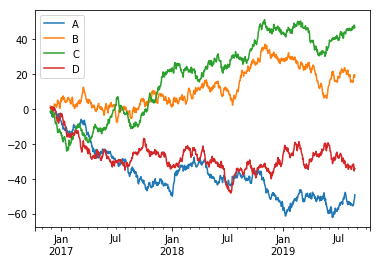

In [40]:
df = df.cumsum()

df.plot(); 

---
### Activity 3

There are  many other things one can do with pandas: data munging (pre-processing), slicing, aggregation, etc.

**Do this:** Please go to http://pandas.pydata.org/pandas-docs/stable/tutorials.html and choose three examples of capabilities of pandas not covered so far. Include them below.

In [41]:
# Example 1
import pandas as pd
import sys
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

# Our small data set
d = {'one':[1,1,1,1,1],
     'two':[2,2,2,2,2],
     'letter':['a','a','b','b','c']}

# Create dataframe
df = pd.DataFrame(d)
print (df)

# Create group object
one = df.groupby('letter')

# Apply sum function
one.sum()

letterone = df.groupby(['letter','one']).sum()
print (letterone)

letterone.index

letterone = df.groupby(['letter','one'], as_index=False).sum()
print (letterone)

letterone.index

Python version 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.23.0
   one  two letter
0    1    2      a
1    1    2      a
2    1    2      b
3    1    2      b
4    1    2      c
            two
letter one     
a      1      4
b      1      4
c      1      2
  letter  one  two
0      a    1    4
1      b    1    4
2      c    1    2


Int64Index([0, 1, 2], dtype='int64')

In [44]:
import pandas as pd
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

d = [1,2,3,4,5,6,7,8,9]
df = pd.DataFrame(d, columns = ['Number'])
print (df)

df.to_excel('Lesson10.xlsx', sheet_name = 'testing', index = False)
print('Done')

Python version 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.23.0
   Number
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
Done


In [45]:
# Example 3

import pandas as pd
import matplotlib
import os
import sys
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

d = {'Channel':[1], 'Number':[255]}
df = pd.DataFrame(d)
print(df)

df.to_excel('test1.xlsx', sheet_name = 'test1', index = False)
df.to_excel('test2.xlsx', sheet_name = 'test2', index = False)
df.to_excel('test3.xlsx', sheet_name = 'test3', index = False)
print('Done')

Python version 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.23.0
Matplotlib version 2.2.2
   Channel  Number
0        1     255
Done


---
### Congratulations, you're done with the pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Assignments, find the link for Pre-class assignment 20181120, and upload it there.

**Please keep a copy the code. We will reuse the code in the class.**

See you in class!